In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\Titanic\data\titanic_limpio.csv")

In [4]:
df.head(2) #leer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,sin datos,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


# EDA (Exploratory Data Analysis)

In [7]:
type(df["Age"].values[0]) #ver el tipo de dato de una columna concreta

numpy.float64

In [8]:
df["Age"].shape #ver la forma de una columna concreta

(891,)

In [11]:
edad = df["Age"] 
np.mean(edad) #media de la columna edad

np.float64(29.36158249158249)

In [15]:
#poner solo dos decimales en la media edad
np.round(np.mean(edad), 2) #media de la columna edad con dos decimales

np.float64(29.36)

In [12]:
np.std(edad) #desviación típica de la columna edad

np.float64(13.012388272793666)

In [13]:
np.min(edad) #mínimo de la columna edad
np.max(edad) #máximo de la columna edad

np.float64(80.0)

<Axes: xlabel='Age', ylabel='Count'>

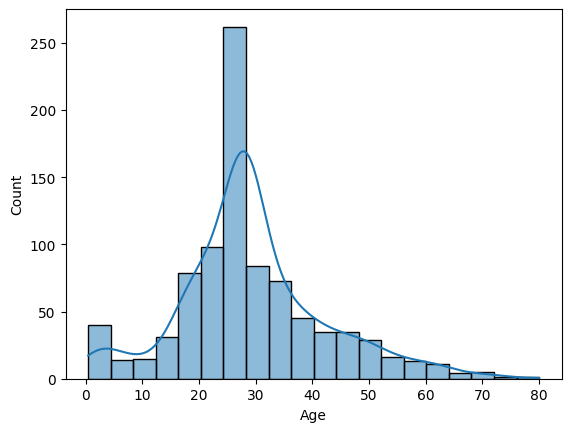

In [16]:
import matplotlib.pyplot as plt #importar librería para gráficos
import seaborn as sns #importar librería para gráficos

sns.histplot(edad, bins=20, kde=True) #histograma de la columna edad con 20 bins y kde (curva de densidad)

<Axes: xlabel='Age'>

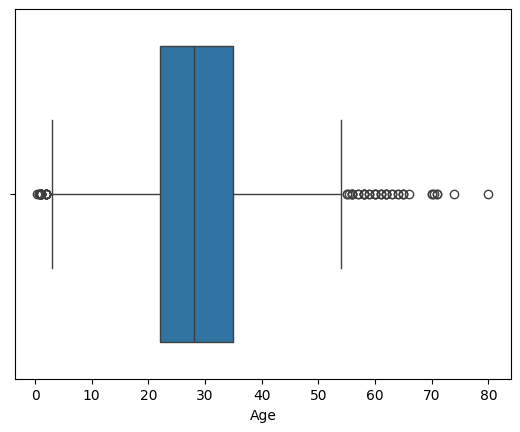

In [17]:
sns.boxplot(x=edad) #boxplot de la columna edad

In [20]:
percentiles = np.percentile(edad, [25, 50, 75]) #percentiles de la columna edad
percentiles

array([22., 28., 35.])

<Axes: xlabel='Fare'>

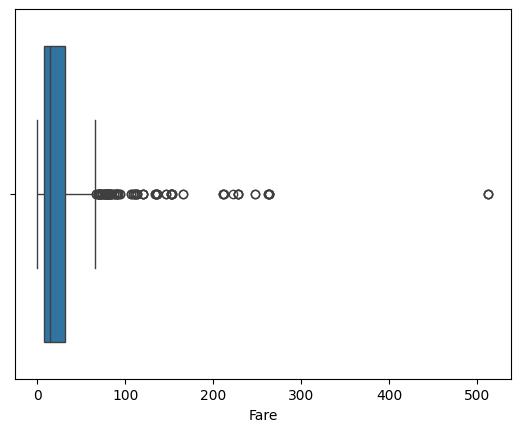

In [25]:
sns.boxplot(x=tarifa) #boxplot de la columna tarifa

In [21]:
tarifa = df["Fare"] #columna tarifa

In [26]:
percentiles = np.percentile(tarifa, [25, 50, 75]) #nos indica los precios comunes de los pasajeros
percentiles

array([ 7.9104, 14.4542, 31.    ])

# Análisis superviviencia

In [28]:
df["Survived"].value_counts() #contar los valores de la columna Survived (sobrevivientes y no sobrevivientes)

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
df["Survived"].mean() * 100 #porcentaje de sobrevivientes

np.float64(38.38383838383838)

In [39]:
#relación entre clase y supervivencia
tabla_clase = df.groupby("Pclass")["Survived"].agg(["count", "mean","sum" ]) #agrupamos por clase y calculamos la media de supervivencia
tabla_clase.columns = ["Conteo", "Media", "Supervivientes"] #cambiamos el nombre de las columnas
tabla_clase = tabla_clase.sort_index() #ordenamos por índice
tabla_clase #mostramos la tabla

,Conteo,Media,Supervivientes
Pclass,,,
1,216,0.629630,136
2,184,0.472826,87
3,491,0.242363,119


In [40]:
#relación entre sexo y supervivencia
tabla_clase = df.groupby("Sex")["Survived"].agg(["count", "mean","sum" ]) #agrupamos por clase y calculamos la media de supervivencia
tabla_clase.columns = ["Conteo", "Sobrevivieron", "Tasa"] #cambiamos el nombre de las columnas
tabla_clase = tabla_clase.sort_index() #ordenamos por índice
tabla_clase #mostramos la tabla

,Conteo,Sobrevivieron,Tasa
Sex,,,
female,314,0.742038,233
male,577,0.188908,109


### Métodos de filtrados

In [43]:
mujeres = df[df["Sex"] == "female"] #filtramos por mujeres
mujeres #mostramos el dataframe filtrado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,sin datos,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,sin datos,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,sin datos,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,sin datos,S,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,sin datos,S,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,sin datos,Q,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [46]:
#Filtrado multivariables
hombres_primera_clase = df[(df["Sex"] == "male") & (df["Pclass"] == 1)] #filtramos por hombres y primera clase
hombres_primera_clase #mostramos el dataframe filtrado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,sin datos,C,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,sin datos,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,11774,29.7000,C47,C,1
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,1
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1


In [50]:
ninos = df[(df["Age"] < 12)] #filtramos por niños
ninos #mostramos el dataframe filtrado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,sin datos,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,sin datos,Q,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,sin datos,S,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,sin datos,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,sin datos,C,0
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,sin datos,S,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,sin datos,S,0
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,sin datos,C,0


In [52]:
#Filtrado Query
adultos_tercera = df.query("Age > 18 & Pclass == 3") #filtramos por adultos y tercera clase
adultos_tercera #mostramos el dataframe filtrado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,sin datos,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,sin datos,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,sin datos,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,sin datos,Q,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,sin datos,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,sin datos,S,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,sin datos,S,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,sin datos,Q,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,sin datos,S,0


In [55]:
#Categorización de una variable
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [58]:
def categorizar_tarifa(Fare):
    if Fare < 10:
        return "Económica"
    elif Fare < 30:
        return "Moderada"
    else:
        return "Alta"

In [60]:
df["Tarifa_clasificada"] = df["Fare"].apply(categorizar_tarifa) #aplicamos la función a la columna tarifa
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina,Tarifa_clasificada
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,sin datos,S,0,Económica
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Alta
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,sin datos,S,0,Económica
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Alta
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,sin datos,S,0,Económica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,sin datos,S,0,Moderada
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Alta
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,sin datos,S,0,Moderada
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Alta
